# Exploring the concept of Decision Trees 

In [30]:
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
import graphviz 
from datetime import datetime


df = pd.read_csv('data/precos.csv')

df["km_por_ano"] = df["milhas_por_ano"] * 1.60934

df["idade_carro"] = datetime.today().year - df["ano_do_modelo"]

df.drop(["milhas_por_ano", "ano_do_modelo"], axis=1, inplace=True)


x = df[['preco', 'idade_carro', 'km_por_ano']]
y = df['vendido']

seed = 2043

treino_x, teste_x, treino_y, teste_y = train_test_split(x,y, random_state=seed, stratify=y)

# scaler = StandardScaler()
# scaler.fit(raw_treino_x)

# treino_x = scaler.transform(raw_treino_x)
# teste_x = scaler.transform(raw_teste_x)


model = DecisionTreeClassifier(max_depth=3)
model.fit(treino_x,treino_y)

prevision = model.predict(teste_x)

accuracy = accuracy_score(teste_y, prevision) * 100

print(f'Accuracy: {accuracy:.2f}%')

Accuracy: 79.12%


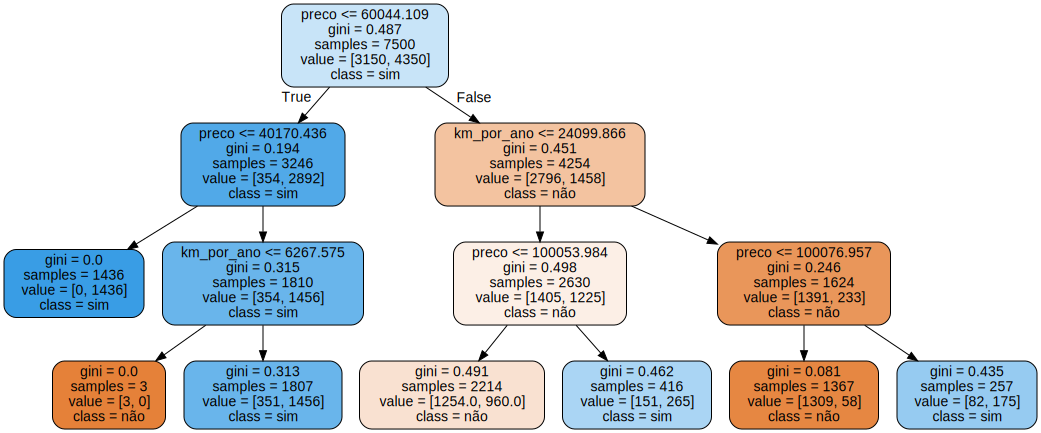

In [31]:
structure = export_graphviz(model, filled=True, 
                            rounded=True, 
                            feature_names=x.columns,
                            class_names=['não', 'sim'])

graph = graphviz.Source(structure)
graph 